<a href="https://colab.research.google.com/github/najmul19/diabetics_classification_from_daily_activities/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for nulls and data types
missing_values = df.isnull().sum()
missing_values

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
feature_names = df.drop("Diabetes_binary", axis=1).columns.tolist()
print(feature_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
#Check duplicate rows
duplicate_c = df.duplicated().sum()
duplicate_c

np.int64(24206)

In [ ]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [ ]:
#duplicates value remove
df = df.drop_duplicates()
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

In [ ]:
#Check duplicate rows again
duplicate_c = df.duplicated().sum()
duplicate_c

np.int64(0)

In [ ]:
y.value_counts(normalize=True)

,proportion
Diabetes_binary,
0.0,0.847055
1.0,0.152945


In [ ]:
#Correlation with Target
c_matrix = df.corr(numeric_only=True)
t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n")
print(t_cor)

Correlation with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [ ]:
#corr_abs t_cor = c_matrix["Diabetes_binary"].drop("Diabetes_binary").abs().sort_values(ascending=False)
corr_abs =t_cor.abs().sort_values(ascending=False)
#top correlated features
print(corr_abs)

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Income                  0.140659
Education               0.102686
PhysActivity            0.100404
Stroke                  0.099193
CholCheck               0.072523
HvyAlcoholConsump       0.065950
MentHlth                0.054153
Smoker                  0.045504
Veggies                 0.041734
Sex                     0.032724
AnyHealthcare           0.025331
Fruits                  0.024805
NoDocbcCost             0.020048
Name: Diabetes_binary, dtype: float64


In [ ]:
#Multicollinearity Check(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
print(vif_data.sort_values("VIF", ascending=False))

                 Feature       VIF
13               GenHlth  1.716096
15              PhysHlth  1.594297
16              DiffWalk  1.511628
20                Income  1.430313
18                   Age  1.353317
0                 HighBP  1.301200
19             Education  1.272080
14              MentHlth  1.221587
6   HeartDiseaseorAttack  1.167062
1               HighChol  1.158112
12           NoDocbcCost  1.135647
7           PhysActivity  1.130509
3                    BMI  1.121050
11         AnyHealthcare  1.109839
9                Veggies  1.098133
8                 Fruits  1.097947
5                 Stroke  1.077470
4                 Smoker  1.076032
17                   Sex  1.075743
2              CholCheck  1.035274
10     HvyAlcoholConsump  1.026354


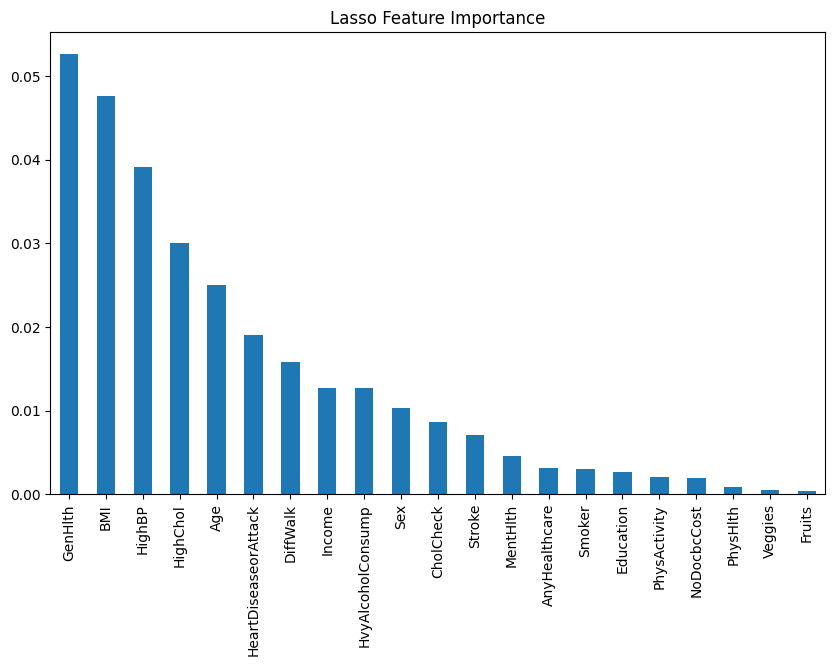

In [ ]:
#Feature Importance Using Lasso Regression(Selection)

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
feature_importance = feature_importance[feature_importance > 0]
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Lasso Feature Importance")
plt.show()

In [ ]:
#Recursive Feature Elimination (RFE) with Logistic
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top Features from RFE:", selected_features.tolist())

Top Features from RFE: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age', 'Income']


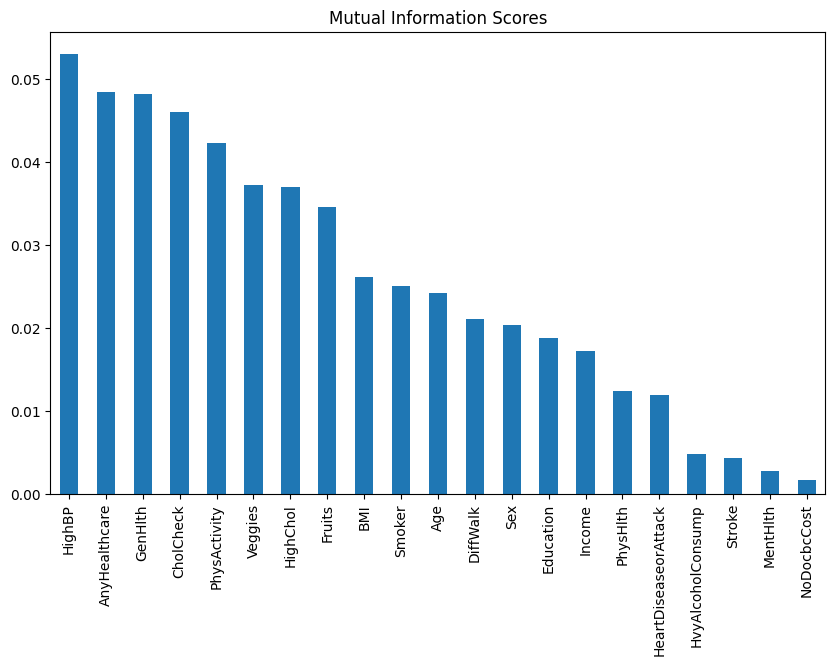

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_series.plot(kind='bar', figsize=(10,6), title='Mutual Information Scores')
plt.show()

In [ ]:

rfe_ranks = pd.Series(
    data=[len(selected_features) - i for i in range(len(selected_features))],
    index=selected_features,
    name='RFERank'
)

lasso_rank = feature_importance.abs().rank(ascending=False).rename('LassoRank')
mi_rank = mi_series.rank(ascending=False).rename('MIRank')

feature_rank_df = pd.concat([lasso_rank, mi_rank, rfe_ranks], axis=1)

feature_rank_df['RFERank'] = feature_rank_df['RFERank'].fillna(len(feature_rank_df) + 1)

feature_rank_df['AverageRank'] = feature_rank_df[['LassoRank', 'MIRank', 'RFERank']].mean(axis=1)

combined_rank = feature_rank_df.sort_values(by='AverageRank')

print("\nCombined Feature Rankings:")
print(combined_rank.round(2))



Combined Feature Rankings:
                      LassoRank  MIRank  RFERank  AverageRank
GenHlth                     1.0     3.0      4.0         2.67
HighBP                      3.0     1.0     10.0         4.67
BMI                         2.0     9.0      7.0         6.00
Age                         5.0    11.0      2.0         6.00
HighChol                    4.0     7.0      9.0         6.67
CholCheck                  11.0     4.0      8.0         7.67
Income                      8.0    15.0      1.0         8.00
Sex                        10.0    13.0      3.0         8.67
HeartDiseaseorAttack        6.0    17.0      6.0         9.67
HvyAlcoholConsump           9.0    18.0      5.0        10.67
AnyHealthcare              14.0     2.0     22.0        12.67
DiffWalk                    7.0    12.0     22.0        13.67
PhysActivity               17.0     5.0     22.0        14.67
Smoker                     15.0    10.0     22.0        15.67
Veggies                    20.0     6.0   

In [ ]:
#menually drop low imapacted feature
#top_features = combined_rank.head(10).index.tolist()
top_features = combined_rank.sort_values('AverageRank').head(10).index.tolist()
X_selected = X[top_features]
X_selected

,GenHlth,HighBP,BMI,Age,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,40.0,9.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,25.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,28.0,9.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,27.0,11.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,24.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,45.0,5.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,18.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,28.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,23.0,7.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
#before going to next step check it
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64


In [ ]:
#start step3 from here
#SMOTE + Tomek Links
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_bal, y_bal = smote_tomek.fit_resample(X_selected, y)

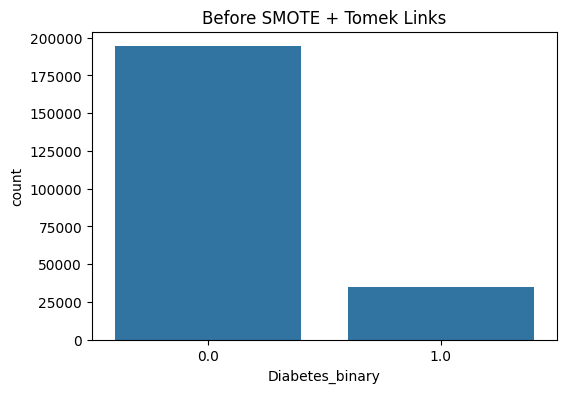

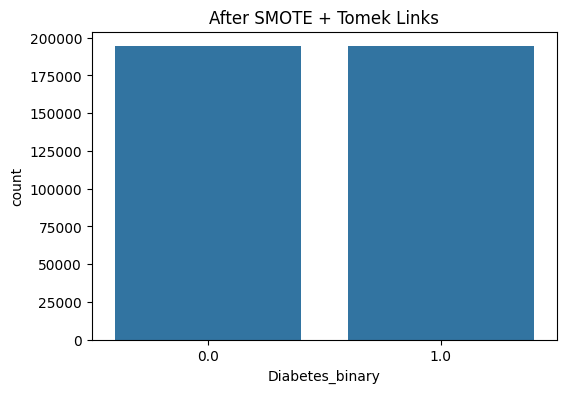

In [ ]:
# Before SMOTE + Tomek Links
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Before SMOTE + Tomek Links")
plt.show()

# After SMOTE + Tomek Links
plt.figure(figsize=(6,4))
sns.countplot(x=y_bal)
plt.title("After SMOTE + Tomek Links")
plt.show()

In [ ]:
# Use SMOTE + Tomek Links balanced data
X_final = X_bal
y_final = y_bal

In [ ]:
#train test, for testing it will be 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

In [ ]:
print("Train set count:\n", y_train.value_counts())
print("\nTest set count:\n", y_test.value_counts())

Train set count:
 Diabetes_binary
1.0    155464
0.0    155464
Name: count, dtype: int64

Test set count:
 Diabetes_binary
0.0    38866
1.0    38866
Name: count, dtype: int64


# ***Step 1  RandomizedSearchCV (fast wide search)***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Base KNN model
knn = KNeighborsClassifier()

# Reduced but still broad search space
param_dist = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # Manhattan / Euclidean
    'algorithm': ['auto', 'ball_tree', 'kd_tree']  # removed 'brute' for speed
}

# RandomizedSearchCV - Optimized for speed
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=10,              # Reduced for speed
    scoring='roc_auc',      # Better for binary classification
    cv=3,                   # Less folds for speed
    random_state=42,
    n_jobs=-1
)

# Fit on a sample to speed up Step 1
sample_size = 100000  # try 50k rows first
random_search.fit(X_train[:sample_size], y_train[:sample_size])

print("Step 1 - RandomizedSearchCV Best Params:", random_search.best_params_)
print("Step 1 - Best CV Score:", random_search.best_score_)


Step 1 - RandomizedSearchCV Best Params: {'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(35), 'algorithm': 'auto'}
Step 1 - Best CV Score: 0.8243575803132495


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
# Evaluation
from sklearn.metrics import f1_score
y_pred = random_search.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7754907762369105
Precision: 0.7782108244342245
Recall: 0.7706023104433066
F1 Score: 0.7743878791012747

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78     38867
         1.0       0.78      0.77      0.77     38867

    accuracy                           0.78     77734
   macro avg       0.78      0.78      0.78     77734
weighted avg       0.78      0.78      0.78     77734



In [ ]:
from sklearn.model_selection import GridSearchCV

# Focused search space based on Step 1
param_grid = {
    'n_neighbors': [6, 7, 8, 9, 10],     # around best=8
    'weights': ['distance'],             # fixed from step 1
    'p': [2],                            # fixed Euclidean
    'algorithm': ['ball_tree']           # fixed from step 1
}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,               # more folds here for accurate estimate
    n_jobs=-1
)

# Fit on full training set for final tuning
grid_search.fit(X_train, y_train)

print("Step 2 - GridSearchCV Best Params:", grid_search.best_params_)
print("Step 2 - Best CV Score:", grid_search.best_score_)


Step 2 - GridSearchCV Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Step 2 - Best CV Score: 0.8777959699638049


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Get the best estimator from grid search
best_knn = grid_search.best_estimator_

# Predict on the test data
y_pred = best_knn.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8254
Precision: 0.8357
Recall: 0.8099
F1 Score: 0.8226

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83     38867
         1.0       0.84      0.81      0.82     38867

    accuracy                           0.83     77734
   macro avg       0.83      0.83      0.83     77734
weighted avg       0.83      0.83      0.83     77734



In [ ]:
from sklearn.metrics import roc_auc_score

y_proba = best_knn.predict_proba(X_test)[:, 1]  # probability for positive class
test_roc_auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC AUC: {test_roc_auc:.4f}")


Test ROC AUC: 0.8837


In [ ]:


y_proba = best_knn.predict_proba(X_test)[:, 1]

best_thresh = 0.5
best_f1 = 0

# Try thresholds from 0.1 to 0.9
for thresh in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.2f}")
print(f"Best F1 score at this threshold: {best_f1:.4f}")


Best threshold: 0.34
Best F1 score at this threshold: 0.8346


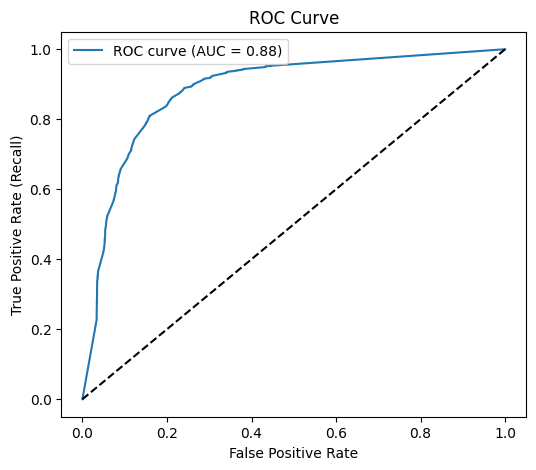

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Get predicted probabilities for positive class
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Predicted classes with best threshold
best_thresh = 0.34
y_pred_thresh = (y_proba >= best_thresh).astype(int)

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {test_roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()



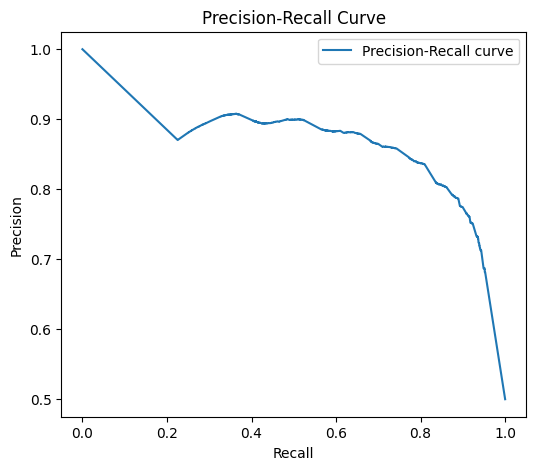

In [ ]:

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



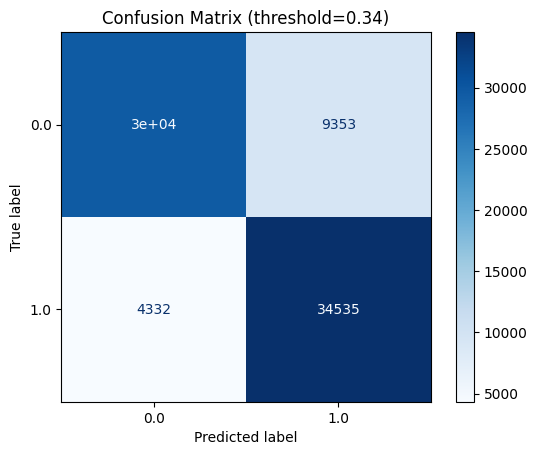

In [ ]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (threshold={best_thresh:.2f})')
plt.show()

In [ ]:
!pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
xgb_clf = XGBClassifier(
    eval_metric='logloss',  # Good for binary classification
    use_label_encoder=False,
    random_state=42
)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:44:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86     38867
         1.0       0.87      0.84      0.85     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734

ROC-AUC: 0.9385550334099996


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)]  # handle imbalance
}

xgb_tune = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='hist'  # Faster for large datasets
)

random_search = RandomizedSearchCV(
    xgb_tune,
    param_distributions=param_grid,
    n_iter=30,  # increase for more thorough search
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:20:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.6, 'scale_pos_weight': 1.0, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best Score: 0.9461171213564935


In [ ]:
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

y_pred_final = best_xgb.predict(X_test)
y_proba_final = best_xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_final))
print("Final ROC-AUC:", roc_auc_score(y_test, y_proba_final))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:20:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     38867
         1.0       0.88      0.84      0.86     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734

Final ROC-AUC: 0.9425263911455695


In [ ]:
# Broad hyperparameter space
param_grid_random = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': [1, 2, 3, 5, 7, 10],
    'scale_pos_weight': [1, sum(y_train==0)/sum(y_train==1)],  # imbalance handling
    'reg_alpha': [0, 0.01, 0.1, 0.5, 1, 5],
    'reg_lambda': [0.1, 0.5, 1, 5, 10]
}

xgb_model_random = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='hist'
)

random_search = RandomizedSearchCV(
    xgb_model_random,
    param_distributions=param_grid_random,
    n_iter=40,  # broad but not too slow
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Params from Random Search:", random_search.best_params_)
print("Best ROC-AUC from Random Search:", random_search.best_score_)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:31:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params from Random Search: {'subsample': 0.5, 'scale_pos_weight': 1.0, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Best ROC-AUC from Random Search: 0.9455694499622703


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Best params from RandomizedSearchCV
best_params_random = {
    'subsample': 0.5,
    'scale_pos_weight': 1.0,
    'reg_lambda': 10,
    'reg_alpha': 1,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 8,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 1.0
}

# Grid for ~150 fits
param_grid_grid = {
    'n_estimators': [
        best_params_random['n_estimators'] - 50,
        best_params_random['n_estimators'],
        best_params_random['n_estimators'] + 50
    ],
    'max_depth': [
        best_params_random['max_depth'] - 1,
        best_params_random['max_depth'],
        best_params_random['max_depth'] + 1
    ],
    'learning_rate': [
        best_params_random['learning_rate'] * 0.9,
        best_params_random['learning_rate'],
        best_params_random['learning_rate'] * 1.1
    ],
    'subsample': [
        best_params_random['subsample'] - 0.05,
        best_params_random['subsample'] + 0.05
    ],
    'colsample_bytree': [
        best_params_random['colsample_bytree'] - 0.05,
        best_params_random['colsample_bytree']
    ]
}

# Fix less-sensitive parameters
fixed_params = {
    'scale_pos_weight': best_params_random['scale_pos_weight'],
    'reg_alpha': best_params_random['reg_alpha'],
    'reg_lambda': best_params_random['reg_lambda'],
    'min_child_weight': best_params_random['min_child_weight'],
    'gamma': best_params_random['gamma']
}

# Base model
xgb_model_grid = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='hist',
    **fixed_params
)

# Grid Search
grid_search = GridSearchCV(
    xgb_model_grid,
    param_grid=param_grid_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params from Grid Search:", grid_search.best_params_)
print("Best ROC-AUC from Grid Search:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:06:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params from Grid Search: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 550, 'subsample': 0.55}
Best ROC-AUC from Grid Search: 0.9464893126187324


In [ ]:
# 1. Get best parameters from GridSearchCV
final_params = grid_search.best_params_
final_params.update(fixed_params)  # add fixed params back in

# 2. Train final model on full training data
final_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    tree_method='hist',
    **final_params
)
final_model.fit(X_train, y_train)

# 3. Evaluate on test data
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred = final_model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC-AUC:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 4. Save the model (optional)
import joblib
joblib.dump(final_model, "final_xgb_model.pkl")


Test ROC-AUC: 0.9430475140322783

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87     38867
         1.0       0.88      0.84      0.86     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734


Confusion Matrix:
 [[34370  4497]
 [ 6147 32720]]


['final_xgb_model.pkl']

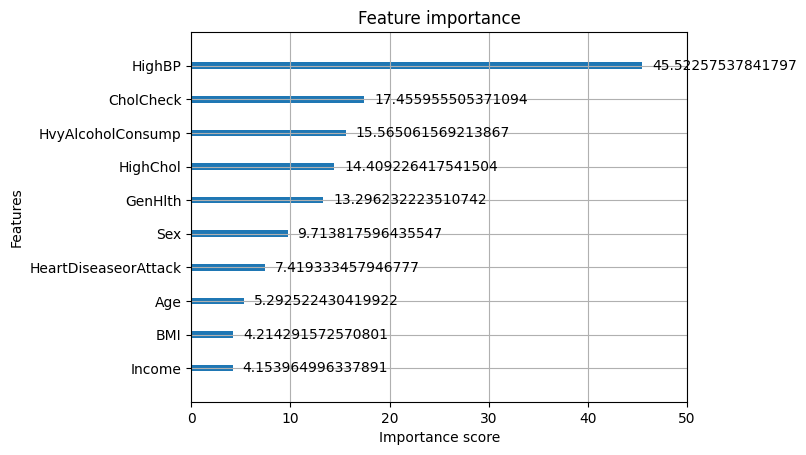

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(final_model, max_num_features=15, importance_type='gain')
plt.show()


In [ ]:
!pip install shap --quiet
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay,
    accuracy_score, classification_report
)
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import StratifiedKFold, learning_curve
from xgboost import XGBClassifier, plot_importance


In [ ]:



# Optional SHAP import (wrap in try/except)
try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False

# set an output folder
OUTDIR = "model_viz_outputs"
os.makedirs(OUTDIR, exist_ok=True)

# helper to save+show figures
def save_show(fig, filename, dpi=150):
    path = os.path.join(OUTDIR, filename)
    fig.savefig(path, bbox_inches="tight", dpi=dpi)
    display(fig)
    plt.close(fig)

# 1) ROC Curve + AUC
y_proba = final_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(7,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (AUC = {roc_auc:.4f})')
save_show(fig, "roc_curve.png")


NameError: name 'final_model' is not defined

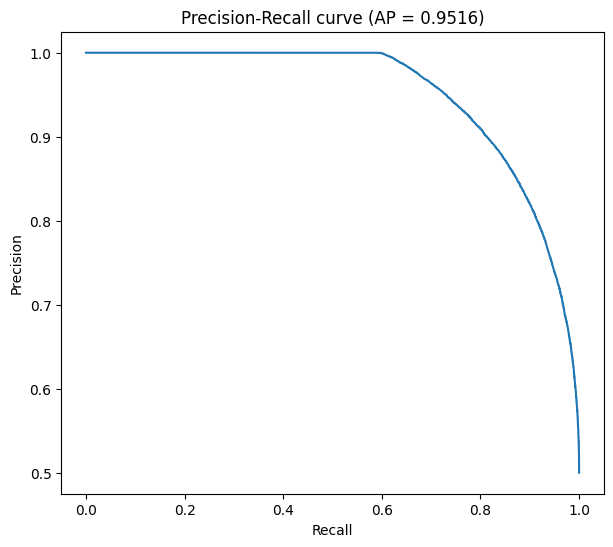

In [ ]:

# 2) Precision-Recall Curve + Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

fig = plt.figure(figsize=(7,6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AP = {avg_prec:.4f})')
save_show(fig, "pr_curve.png")


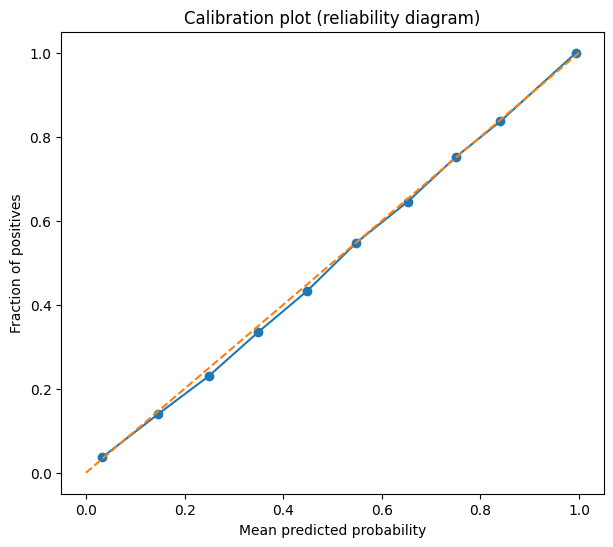

In [ ]:

# 3) Calibration plot (reliability diagram)
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
fig = plt.figure(figsize=(7,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability diagram)')
save_show(fig, "calibration_plot.png")



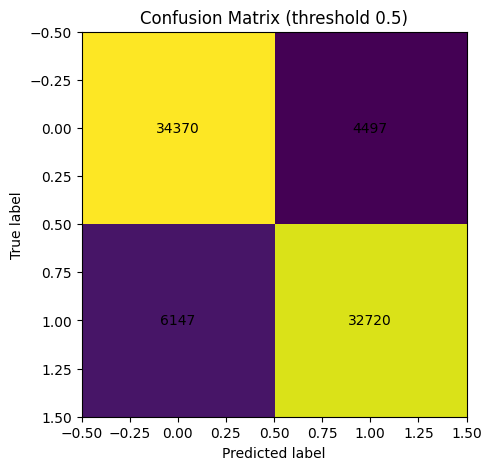

Accuracy: 0.8630715002444233
Classification report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87     38867
         1.0       0.88      0.84      0.86     38867

    accuracy                           0.86     77734
   macro avg       0.86      0.86      0.86     77734
weighted avg       0.86      0.86      0.86     77734



In [ ]:
# 4) Confusion matrix (threshold = 0.5)
y_pred = (y_proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix (threshold 0.5)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center')
save_show(fig, "confusion_matrix.png")

# Print classification report & accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))




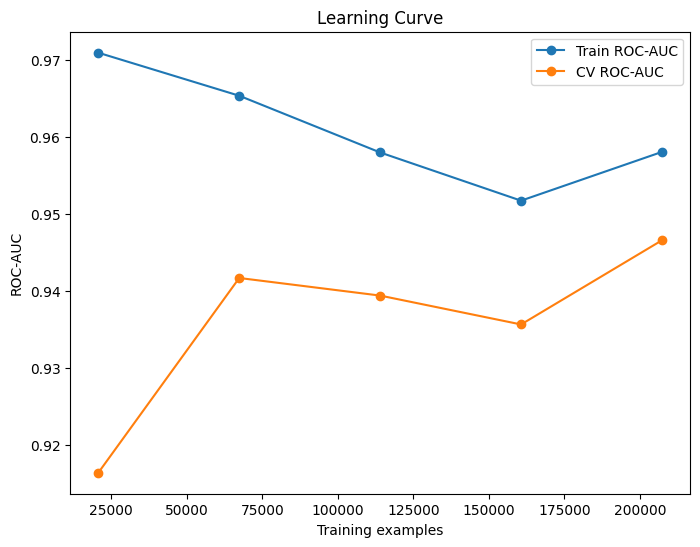

In [ ]:
# 5) Learning curve (shows training/validation score vs training size)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    final_model, X_train, y_train, cv=cv, scoring='roc_auc',
    n_jobs=-1, train_sizes=np.linspace(0.1,1.0,5), shuffle=True, random_state=42
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
fig = plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Train ROC-AUC')
plt.plot(train_sizes, test_scores_mean, marker='o', label='CV ROC-AUC')
plt.xlabel('Training examples')
plt.ylabel('ROC-AUC')
plt.title('Learning Curve')
plt.legend()
save_show(fig, "learning_curve.png")



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

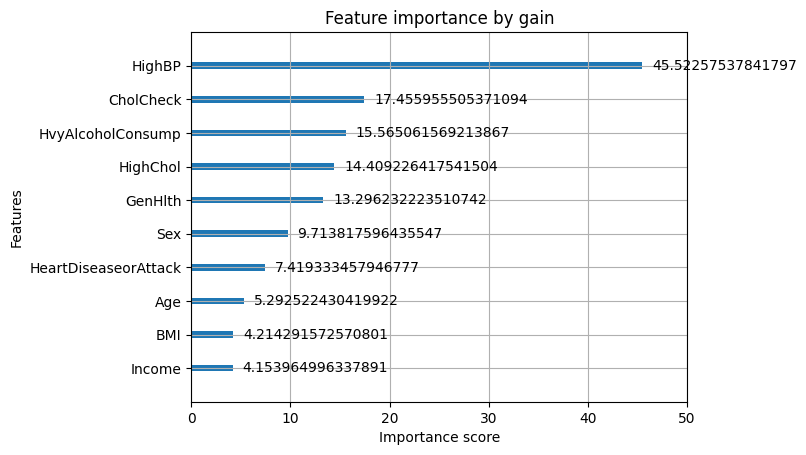

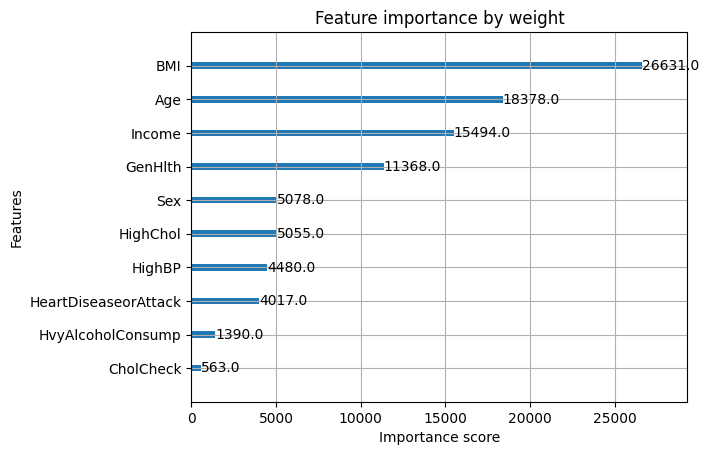

In [ ]:
# 6) Feature importance (XGBoost built-in: gain & weight)
fig = plt.figure(figsize=(8,6))
plot_importance(final_model, importance_type='gain')
plt.title('Feature importance by gain')
save_show(fig, "feature_importance_gain.png")

fig = plt.figure(figsize=(8,6))
plot_importance(final_model, importance_type='weight')
plt.title('Feature importance by weight')
save_show(fig, "feature_importance_weight.png")


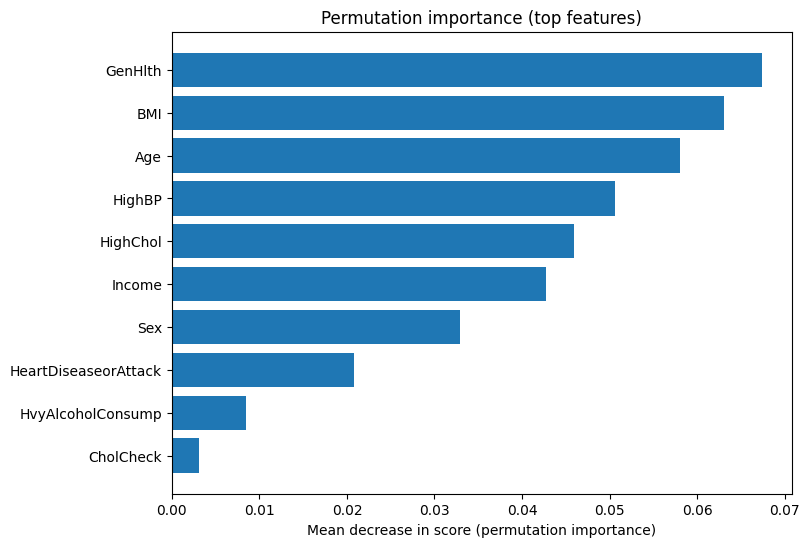

In [ ]:

# 7) Permutation importance (model-agnostic)
# Safe permutation importance plotting
r = permutation_importance(final_model, X_test, y_test, n_repeats=12, random_state=42, n_jobs=-1)

sorted_idx = r.importances_mean.argsort()[::-1]  # sort descending

fig = plt.figure(figsize=(8,6))
plt.barh(np.arange(len(sorted_idx)), r.importances_mean[sorted_idx])
plt.yticks(np.arange(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.gca().invert_yaxis()
plt.xlabel("Mean decrease in score (permutation importance)")
plt.title("Permutation importance (top features)")
save_show(fig, "permutation_importance.png")



Top 3 features and their value ranges:
Feature: HighBP
  Min: 0.0, Max: 1.0, Unique values: 12503
Feature: BMI
  Min: 12.0, Max: 98.0, Unique values: 23311
Feature: CholCheck
  Min: 0.0, Max: 1.0, Unique values: 1018



<Figure size 1000x600 with 0 Axes>

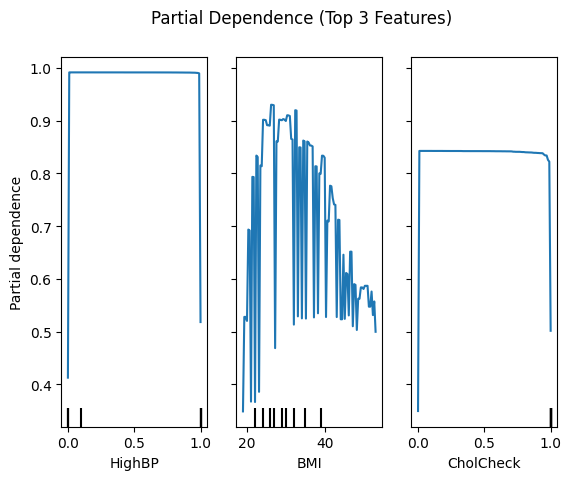

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

def save_show(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.show()

# Assuming you have:
# - final_model: your trained XGBClassifier or similar model
# - X_train: training DataFrame or ndarray with feature columns
# - feature_names: list or array of feature names matching X_train columns

# 1) Compute permutation importance
result = permutation_importance(final_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# 2) Sort features by importance descending
sorted_idx = result.importances_mean.argsort()[::-1]

# 3) Select top 3 features by importance
top_features = list(np.array(feature_names)[sorted_idx[:3]])

# 4) Print basic info for top features (optional but helpful)
print("Top 3 features and their value ranges:")
for f in top_features:
    print(f"Feature: {f}")
    print(f"  Min: {X_train[f].min()}, Max: {X_train[f].max()}, Unique values: {X_train[f].nunique()}")
print()

# 5) Plot partial dependence with widened percentile range to avoid grid error
fig = plt.figure(figsize=(10,6))
PartialDependenceDisplay.from_estimator(
    final_model,
    X_train,
    features=top_features,
    kind="average",
    percentiles=(0.01, 0.99)  # wider percentiles to avoid "too close" error
)
plt.suptitle("Partial Dependence (Top 3 Features)")
save_show(fig, "partial_dependence_top3.png")



/tmp/ipython-input-2176967651.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_for_shap, feature_names=feature_names, show=False)


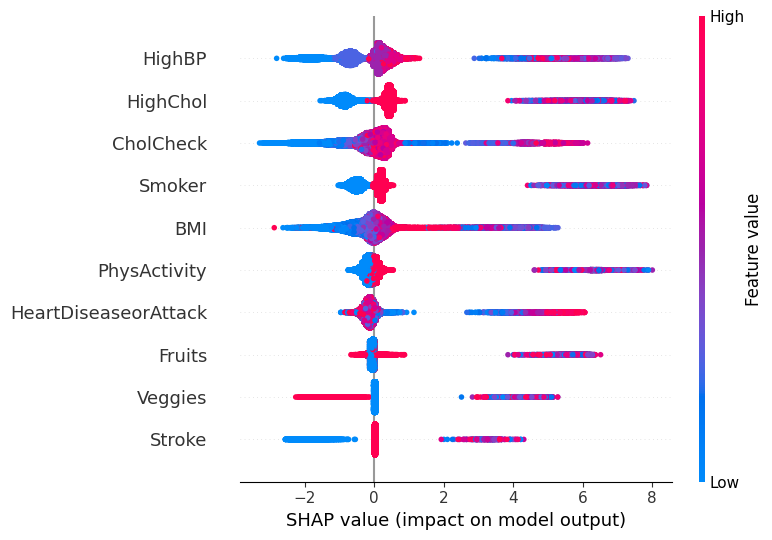

<Figure size 800x600 with 0 Axes>

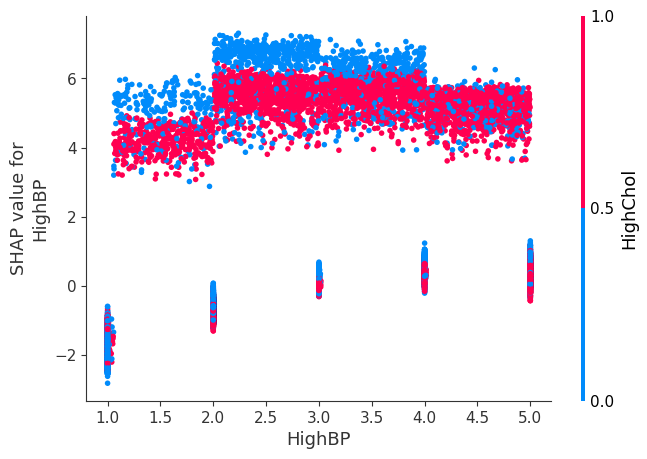

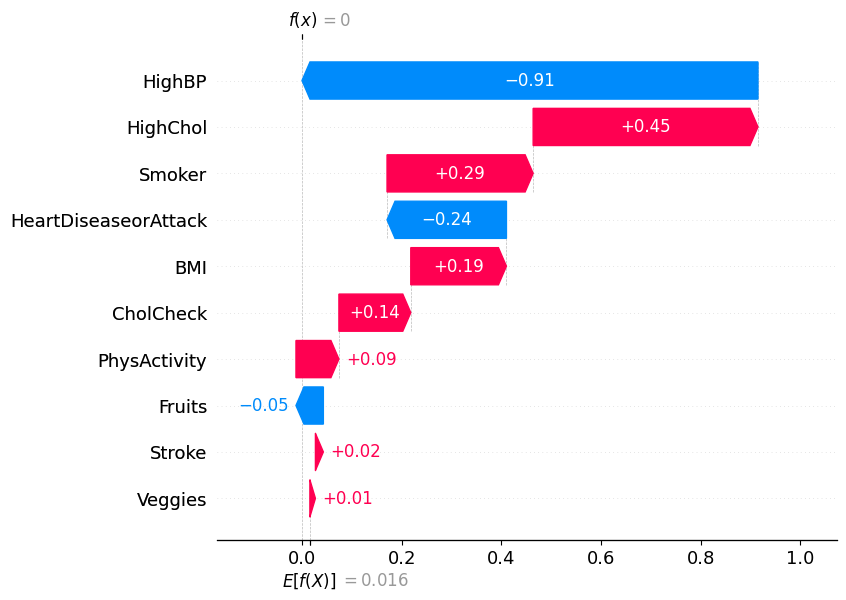

All plots saved to: model_viz_outputs


In [ ]:
# 9) SHAP explanations (if available) - summary + dependence + single prediction waterfall
if SHAP_AVAILABLE:
    # TreeExplainer is efficient for XGBoost
    explainer = shap.TreeExplainer(final_model)
    # convert to numpy if DataFrame
    X_for_shap = X_test if hasattr(X_test, "values") else X_test
    shap_values = explainer.shap_values(X_for_shap)
    # summary plot
    fig = plt.figure(figsize=(8,6))
    shap.summary_plot(shap_values, X_for_shap, feature_names=feature_names, show=False)
    save_show(fig, "shap_summary.png")

    # dependence plot for top feature
    top_f = top_features[0]
    fig = plt.figure(figsize=(8,6))
    shap.dependence_plot(top_f, shap_values, X_for_shap, feature_names=feature_names, show=False)
    save_show(fig, "shap_dependence_top1.png")

    # single sample explanation (choose a borderline example)
    # find a sample with prediction close to 0.5
    idx = np.argmin(np.abs(y_proba - 0.5))
    fig = plt.figure(figsize=(8,6))
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[idx,:], feature_names=feature_names, show=False)
    save_show(fig, "shap_waterfall_sample.png")
else:
    print("SHAP is not available. To enable SHAP plots, run: `pip install shap` and re-run this cell.")

# 10) Save model (optionally)
import joblib
joblib.dump(final_model, os.path.join(OUTDIR, "final_xgb_model.pkl"))

print("All plots saved to:", OUTDIR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Replace 'MyDrive' with 'My Drive' if needed (Drive's root folder)
shutil.copytree('/content/model_viz_outputs', '/content/drive/MyDrive/model_viz_outputs')


'/content/drive/MyDrive/model_viz_outputs'

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# --- Base Random Forest Model ---
rf_clf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    criterion='gini',      # split quality metric
    max_features='sqrt',   # default for classification
    random_state=42,       # reproducibility
    n_jobs=-1              # use all CPU cores
)

# Train
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))




Accuracy: 0.8663776468469395

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     38867
         1.0       0.87      0.86      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734


Confusion Matrix:
 [[33867  5000]
 [ 5387 33480]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8664


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# --- Parameter grid for RandomizedSearchCV ---
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),          # number of trees
    'max_depth': [None] + list(np.arange(5, 51, 5)),    # depth of tree
    'min_samples_split': [2, 5, 10],                    # min samples to split
    'min_samples_leaf': [1, 2, 4],                      # min samples in leaf
    'max_features': ['sqrt', 'log2', 0.5, 0.8],         # features considered at split
    'bootstrap': [True, False]                          # sampling method
}

# --- Randomized Search ---
rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=30,               # number of random combinations
    scoring='roc_auc',       # metric to optimize
    cv=3,                    # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- Fit on a sample to speed up Step 1 ---
sample_size = 50000  # try 50k rows first
rf_random.fit(X_train[:sample_size], y_train[:sample_size])

# Best parameters
print("Best Parameters:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)

# --- Final Model with Best Parameters ---
best_rf = rf_random.best_estimator_

# Retrain on full training data
best_rf.fit(X_train, y_train)

# Predict & Evaluate
y_pred_best = best_rf.predict(X_test)
print("\nFinal Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': np.int64(600), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': np.int64(30), 'bootstrap': False}
Best CV Score: 0.9072438632933549

Final Accuracy: 0.8696452002984537

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     38867
         1.0       0.87      0.87      0.87     38867

    accuracy                           0.87     77734
   macro avg       0.87      0.87      0.87     77734
weighted avg       0.87      0.87      0.87     77734


Confusion Matrix:
 [[33797  5070]
 [ 5063 33804]]


In [ ]:
print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

ROC-AUC: 0.9453314811418777


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [500, 600, 700],
    'max_depth': [25, 30, 35],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2'],
    'bootstrap': [False]
}

# --- Grid Search ---
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- Fit on sample for speed ---
sample_size = 50000
rf_grid.fit(X_train[:sample_size], y_train[:sample_size])

# Best parameters
print("Best Parameters (GridSearchCV):", rf_grid.best_params_)
print("Best CV Score:", rf_grid.best_score_)




Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters (GridSearchCV): {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 700}
Best CV Score: 0.9078886162528855


In [ ]:
# --- Final Model with Best Parameters ---
best_rf_grid = rf_grid.best_estimator_

# Retrain on full data
best_rf_grid.fit(X_train, y_train)

# Predict & Evaluate
y_pred_grid = best_rf_grid.predict(X_test)
print("\nFinal Accuracy:", accuracy_score(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))


Final Accuracy: 0.8678150568620387

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     38866
         1.0       0.86      0.88      0.87     38866

    accuracy                           0.87     77732
   macro avg       0.87      0.87      0.87     77732
weighted avg       0.87      0.87      0.87     77732


Confusion Matrix:
 [[33113  5753]
 [ 4522 34344]]


In [ ]:
print(best_rf_grid)

RandomForestClassifier(bootstrap=False, max_depth=25, max_features='log2',
                       min_samples_split=15, n_estimators=700, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
final_best_rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=25,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=700,
    random_state=42,
    n_jobs=-1
)

final_best_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, max_depth=25, max_features='log2',
                       min_samples_split=15, n_estimators=700, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = final_best_rf.predict(X_test)
y_prob = final_best_rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8678150568620387

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     38866
         1.0       0.86      0.88      0.87     38866

    accuracy                           0.87     77732
   macro avg       0.87      0.87      0.87     77732
weighted avg       0.87      0.87      0.87     77732


Confusion Matrix:
 [[33113  5753]
 [ 4522 34344]]

ROC-AUC: 0.9440085272913431


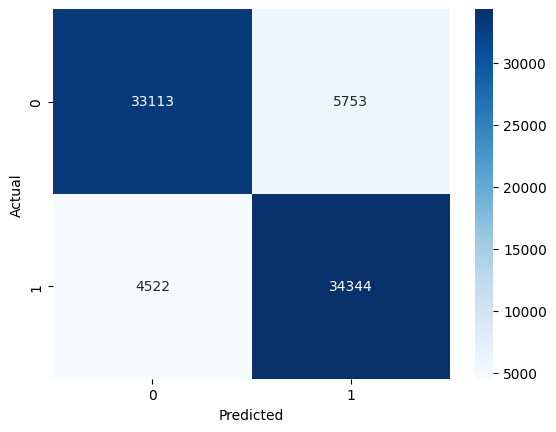

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



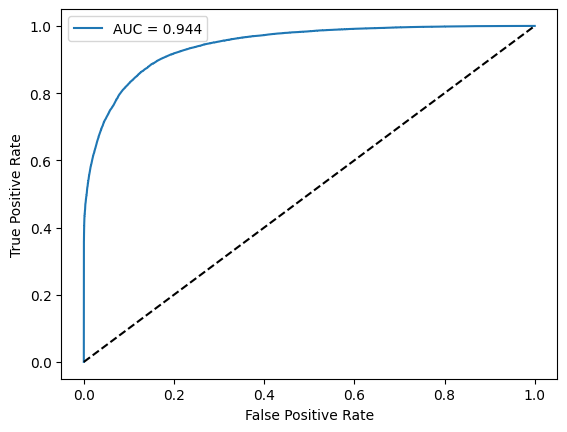

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()




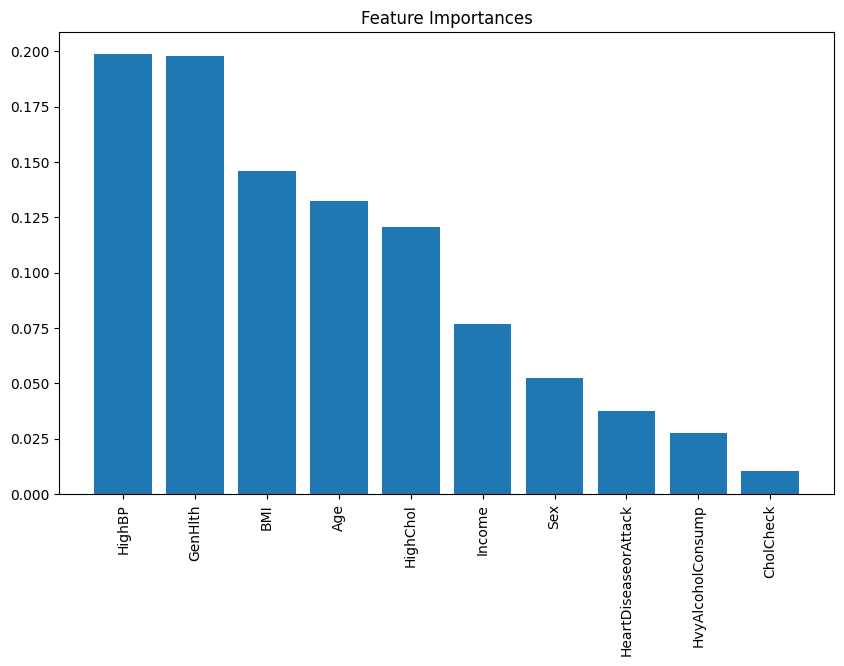

In [ ]:
# Feature Importances
importances = final_best_rf.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

In [ ]:
X_selected

,GenHlth,HighBP,BMI,Age,HighChol,CholCheck,Income,Sex,HeartDiseaseorAttack,HvyAlcoholConsump
0,5.0,1.0,40.0,9.0,1.0,1.0,3.0,0.0,0.0,0.0
1,3.0,0.0,25.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.0,1.0,28.0,9.0,1.0,1.0,8.0,0.0,0.0,0.0
3,2.0,1.0,27.0,11.0,0.0,1.0,6.0,0.0,0.0,0.0
4,2.0,1.0,24.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,3.0,1.0,45.0,5.0,1.0,1.0,7.0,1.0,0.0,0.0
253676,4.0,1.0,18.0,11.0,1.0,1.0,4.0,0.0,0.0,0.0
253677,1.0,0.0,28.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
253678,3.0,1.0,23.0,7.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

# ==== 1. Confusion Matrix ====
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size":14})
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# ==== 2. ROC Curve ====
def plot_roc(y_true, y_score, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.tight_layout()
    plt.show()

# ==== 3. Precision-Recall Curve ====
def plot_precision_recall(y_true, y_score, title="Precision-Recall Curve"):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, color="purple", lw=2, label=f"AUC = {pr_auc:.3f}")
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc="lower left", fontsize=12)
    plt.tight_layout()
    plt.show()

# ==== 4. Top Feature Importances ====
def plot_feature_importance(model, feature_names, top_n=15, title="Top Feature Importances"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(8,6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
    plt.xlabel("Feature Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# ==== 5. GridSearchCV Heatmap (Optional) ====
def plot_gridsearch_heatmap(grid_search, param_x, param_y, score_name="mean_test_score"):
    results = grid_search.cv_results_
    scores = np.array(results[score_name]).reshape(len(grid_search.param_grid[param_y]),
                                                   len(grid_search.param_grid[param_x]))
    plt.figure(figsize=(8,6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="YlGnBu",
                xticklabels=grid_search.param_grid[param_x],
                yticklabels=grid_search.param_grid[param_y])
    plt.xlabel(param_x, fontsize=12)
    plt.ylabel(param_y, fontsize=12)
    plt.title(f"GridSearchCV {score_name} Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()



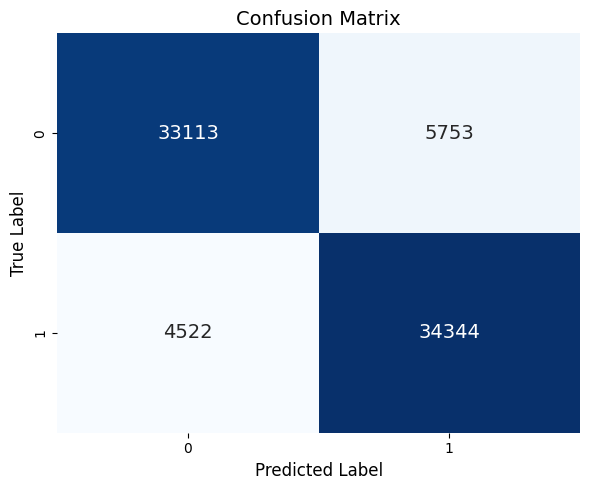

In [ ]:
# ==== Usage Example ====
# Predictions
y_pred = final_best_rf.predict(X_test)
y_score = final_best_rf.predict_proba(X_test)[:, 1]

# Plotting
plot_confusion_matrix(y_test, y_pred)



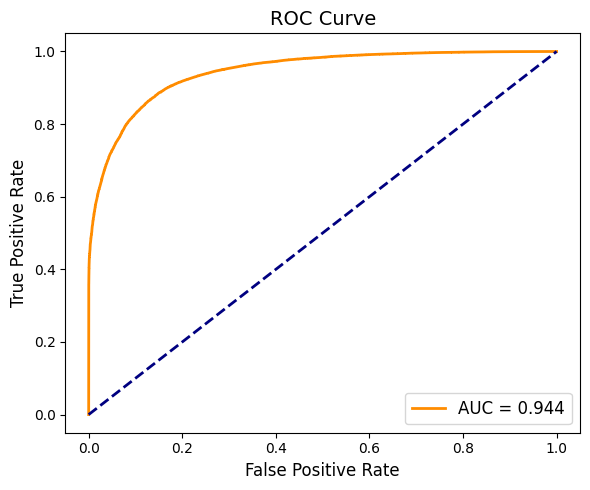

In [ ]:
plot_roc(y_test, y_score)


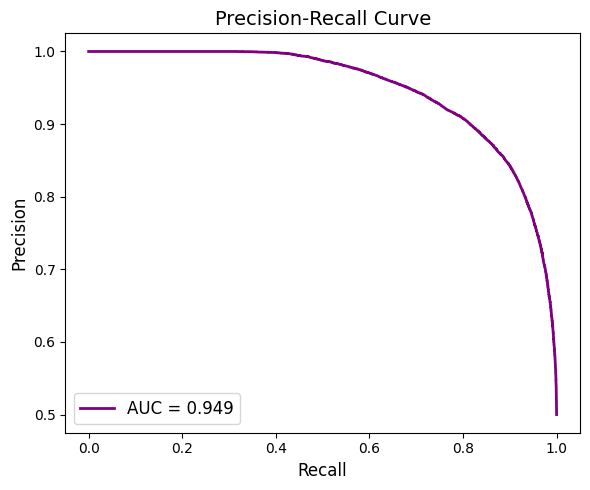

In [ ]:
plot_precision_recall(y_test, y_score)


/tmp/ipython-input-80657058.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")


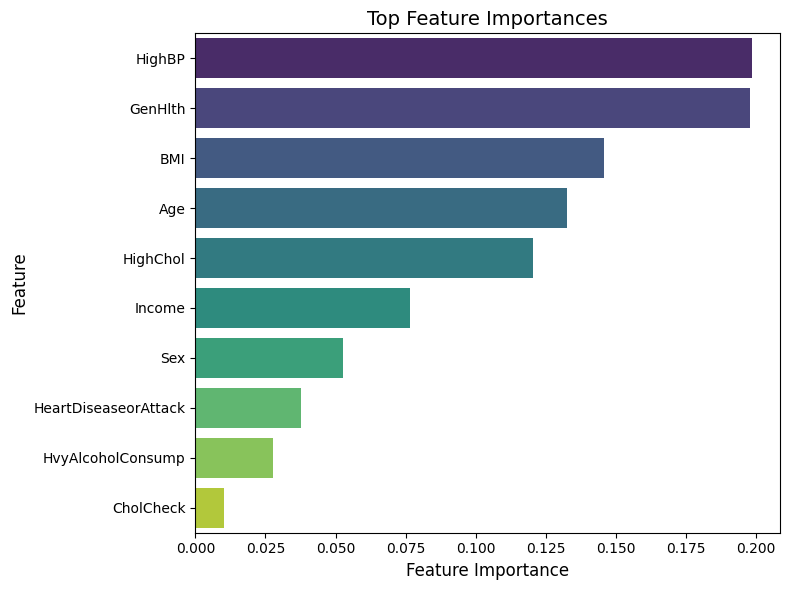

In [ ]:
plot_feature_importance(final_best_rf, X_train.columns)



In [ ]:


!pip install shap --quiet
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay,
    accuracy_score, classification_report
)
from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import StratifiedKFold, learning_curve
from xgboost import XGBClassifier, plot_importance






In [ ]:
import os

try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False

# set an output folder
OUTDIR = "random_forest_model_viz_outputs"
os.makedirs(OUTDIR, exist_ok=True)

# helper to save+show figures
def save_show(fig, filename, dpi=150):
    path = os.path.join(OUTDIR, filename)
    fig.savefig(path, bbox_inches="tight", dpi=dpi)
    display(fig)
    plt.close(fig)



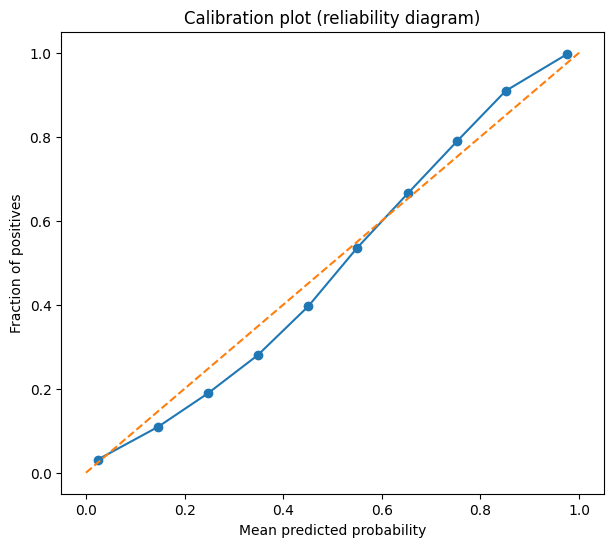

In [ ]:

# 3) Calibration plot (reliability diagram)
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
fig = plt.figure(figsize=(7,6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot (reliability diagram)')
save_show(fig, "random_f_calibration_plot.png")



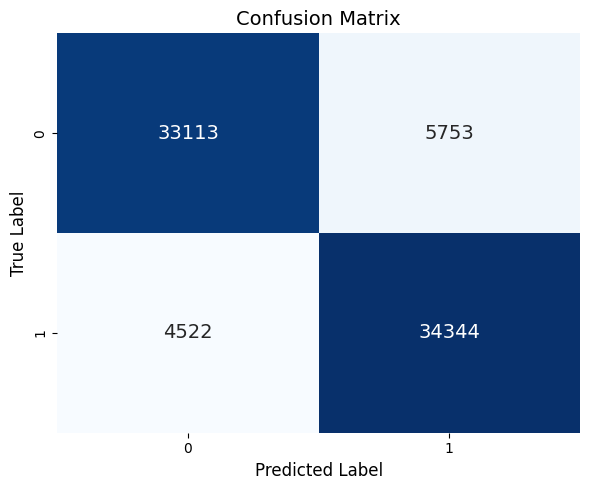

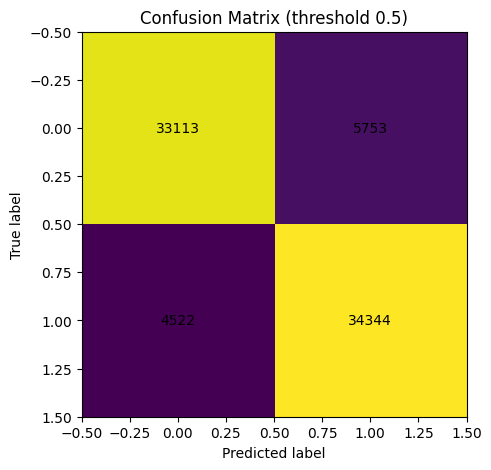

In [ ]:

# 4) Confusion matrix (threshold = 0.5)
plot_confusion_matrix(y_test,y_pred)
save_show(fig, "random_f_confusion_matrix.png")



/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


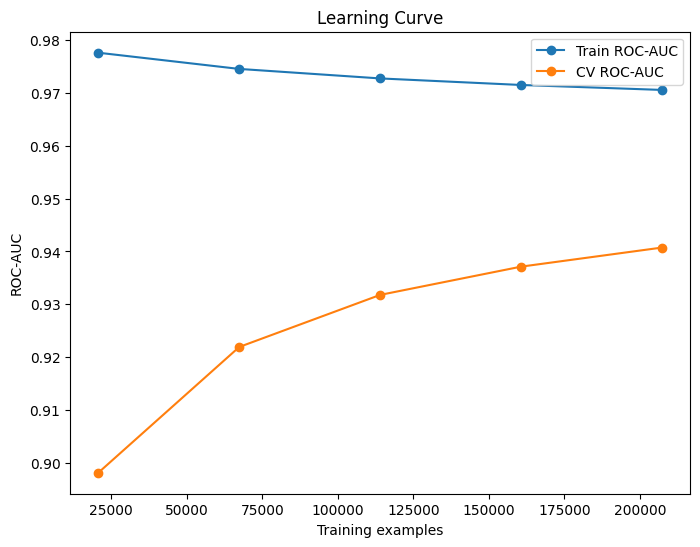

In [ ]:

# 5) Learning curve (shows training/validation score vs training size)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    final_best_rf, X_train, y_train, cv=cv, scoring='roc_auc',
    n_jobs=-1, train_sizes=np.linspace(0.1,1.0,5), shuffle=True, random_state=42
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)
fig = plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Train ROC-AUC')
plt.plot(train_sizes, test_scores_mean, marker='o', label='CV ROC-AUC')
plt.xlabel('Training examples')
plt.ylabel('ROC-AUC')
plt.title('Learning Curve')
plt.legend()
save_show(fig, "random_f_learning_curve.png")




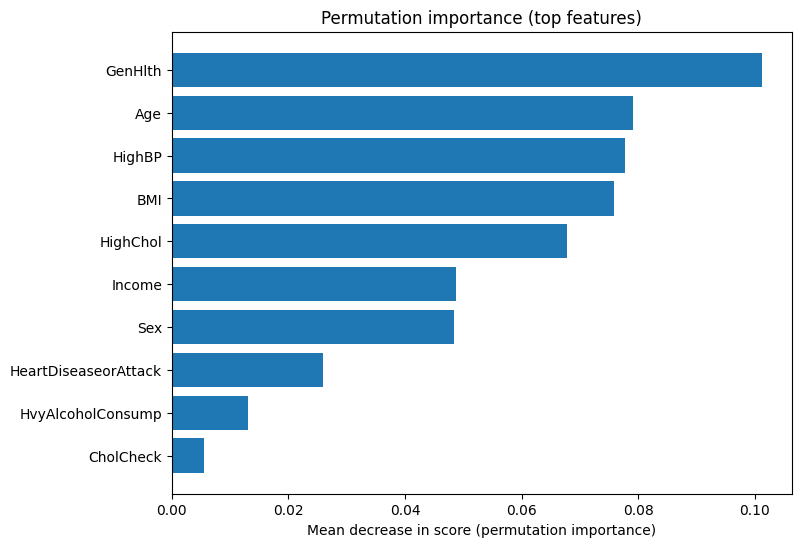

In [ ]:

# 7) Permutation importance (model-agnostic)
# Safe permutation importance plotting
from sklearn.inspection import permutation_importance

r = permutation_importance(final_best_rf, X_test, y_test, n_repeats=8, random_state=42, n_jobs=1)

sorted_idx = r.importances_mean.argsort()[::-1]  # sort descending

fig = plt.figure(figsize=(8,6))
plt.barh(np.arange(len(sorted_idx)), r.importances_mean[sorted_idx])
plt.yticks(np.arange(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.gca().invert_yaxis()
plt.xlabel("Mean decrease in score (permutation importance)")
plt.title("Permutation importance (top features)")
save_show(fig, "random_f_permutation_importance.png")




KeyError: np.int64(0)

<Figure size 800x600 with 0 Axes>

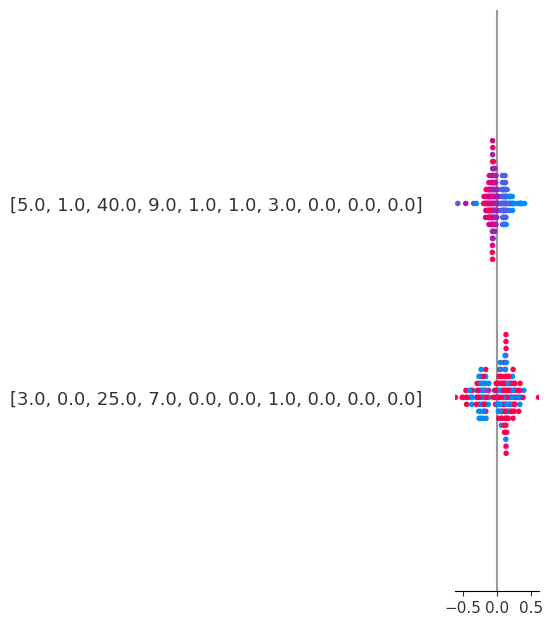

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt


def save_show(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.show()

# 1️⃣ Reduce rows for SHAP
X_sample = X_test.sample(200, random_state=42)
y_sample = y_test.loc[X_sample.index]

# 2️⃣ Use fewer trees for SHAP only
rf_small = RandomForestClassifier(
    n_estimators=50,  # instead of 500+
    max_depth=final_best_rf.max_depth,
    random_state=42
)
rf_small.fit(X_train, y_train)

# 3️⃣ Fast TreeExplainer
explainer = shap.TreeExplainer(rf_small, feature_perturbation="tree_path_dependent")

# 4️⃣ Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# 5️⃣ Summary plot
fig = plt.figure(figsize=(8,6))
shap.summary_plot(shap_values, X_sample, feature_names=X_selected, show=False)
save_show(fig, "random_f_shap_summary.png")

# 6️⃣ Dependence plot for top feature
top_f = X_selected[0]
fig = plt.figure(figsize=(8,6))
shap.dependence_plot(top_f, shap_values, X_sample, feature_names=X_selected, show=False)
save_show(fig, "random_f_shap_dependence_top1.png")

# 7️⃣ Single sample explanation
y_proba = rf_small.predict_proba(X_sample)[:,1]
idx = np.argmin(np.abs(y_proba - 0.5))
fig = plt.figure(figsize=(8,6))
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1],
    shap_values[1][idx,:],
    feature_names=X_selected,
    show=False
)
save_show(fig, "random_f_shap_waterfall_sample.png")


In [ ]:

from sklearn.inspection import PartialDependenceDisplay, permutation_importance

def save_show(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.show()



# 1) Compute permutation importance
result = permutation_importance(final_best_rf, X_train, y_train, n_repeats=6, random_state=42, n_jobs=1)

# 2) Sort features by importance descending
sorted_idx = result.importances_mean.argsort()[::-1]







Top 3 features and their value ranges:
Feature: [ 5.  1.  9. 40.  1.  1.  3.  0.  0.  0.]


KeyError: "None of [Index([5.0, 1.0, 9.0, 40.0, 1.0, 1.0, 3.0, 0.0, 0.0, 0.0], dtype='float64')] are in the [columns]"

In [ ]:
top_features = X_selected.columns[sorted_idx[:3]].tolist()
# 4) Print basic info for top features (optional but helpful)
print("Top 3 features and their value ranges:")
for f in top_features:
    print(f"Feature: {f}")
    print(f"  Min: {X_train[f].min()}, Max: {X_train[f].max()}, Unique values: {X_train[f].nunique()}")
print()

# 5) Plot partial dependence with widened percentile range to avoid grid error
fig = plt.figure(figsize=(10,6))
PartialDependenceDisplay.from_estimator(
    final_best_rf,
    X_train,
    features=top_features,
    kind="average",
    percentiles=(0.01, 0.99)  # wider percentiles to avoid "too close" error
)
plt.suptitle("Partial Dependence (Top 3 Features)")
save_show(fig, "random_f_partial_dependence_top3.png")


Top 3 features and their value ranges:
Feature: GenHlth
  Min: 1.0, Max: 5.0, Unique values: 19797
Feature: Age
  Min: 1.0, Max: 13.0, Unique values: 20515
Feature: BMI
  Min: 12.0, Max: 98.0, Unique values: 23311



KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [ ]:
import shap


# Check SHAP availability
SHAP_AVAILABLE = True

def save_show(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.show()

if SHAP_AVAILABLE:
    # Use TreeExplainer for Random Forest
    explainer = shap.TreeExplainer(final_best_rf)

    # Convert X_test to DataFrame if needed
    X_for_shap = X_test if hasattr(X_test, "values") else X_test

    # Compute SHAP values
    shap_values = explainer.shap_values(X_for_shap)

    # Summary plot
    fig = plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X_for_shap, feature_names=X_selected, show=False)
    save_show(fig, "random_f_shap_summary.png")

    # Dependence plot for top feature
    top_f = X_selected[0]  # first feature in your selected features
    fig = plt.figure(figsize=(8, 6))
    shap.dependence_plot(top_f, shap_values, X_for_shap, feature_names=X_selected, show=False)
    save_show(fig, "random_f_shap_dependence_top1.png")

    # Single sample explanation (prediction close to 0.5)
    y_proba = final_best_rf.predict_proba(X_for_shap)[:, 1]
    idx = np.argmin(np.abs(y_proba - 0.5))

    fig = plt.figure(figsize=(8, 6))
    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value[1],  # class 1 expected value
        shap_values[1][idx, :],       # class 1 SHAP values
        feature_names=X_selected,
        show=False
    )
    save_show(fig, "random_f_shap_waterfall_sample.png")

else:
    print("SHAP is not available. To enable SHAP plots, run: `pip install shap` and re-run this cell.")


NameError: name 'final_best_rf' is not defined

In [ ]:
# 10) Save model (optionally)
import joblib
joblib.dump(final_model, os.path.join(OUTDIR, "random_f_final_xgb_model.pkl"))

print("All plots saved to:", OUTDIR)